In [17]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing 

import tensorflow_datasets as tfds

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [4]:
# https://www.tensorflow.org/tutorials/images/segmentation
# WARNING: this will download a huge dataset into your local C: drive
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling oxford_iiit_pet-train.tfrecord...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling oxford_iiit_pet-test.tfrecord...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Dataset oxford_iiit_pet downloaded and prepared to C:\Users\user\tensorflow_datasets\oxford_iiit_pet\3.2.0. Subsequent calls will reuse this data.


In [5]:
type(dataset['train'])

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [26]:
for x in dataset['train'].take(1):
    print(x.keys())
    img = x['image']
    mask = x['segmentation_mask']
    label = x['label']

dict_keys(['file_name', 'image', 'label', 'segmentation_mask', 'species'])


In [27]:
img.shape, mask.shape, label.shape

(TensorShape([500, 500, 3]), TensorShape([500, 500, 1]), TensorShape([]))

In [28]:
np.unique(mask)

array([1, 2, 3], dtype=uint8)

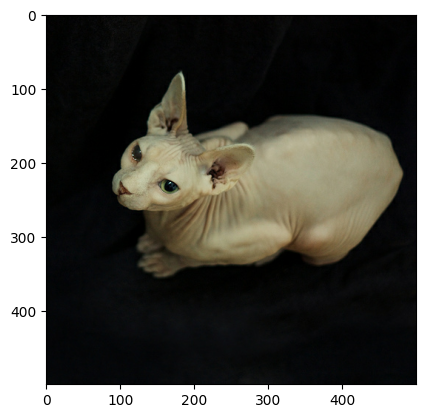

In [29]:
plt.imshow(img)
plt.show()

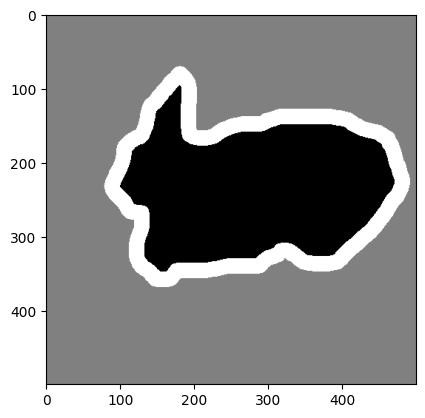

In [30]:
plt.imshow(mask, cmap='gray')
plt.show()

In [ ]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

In [ ]:
def load_image(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [ ]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE